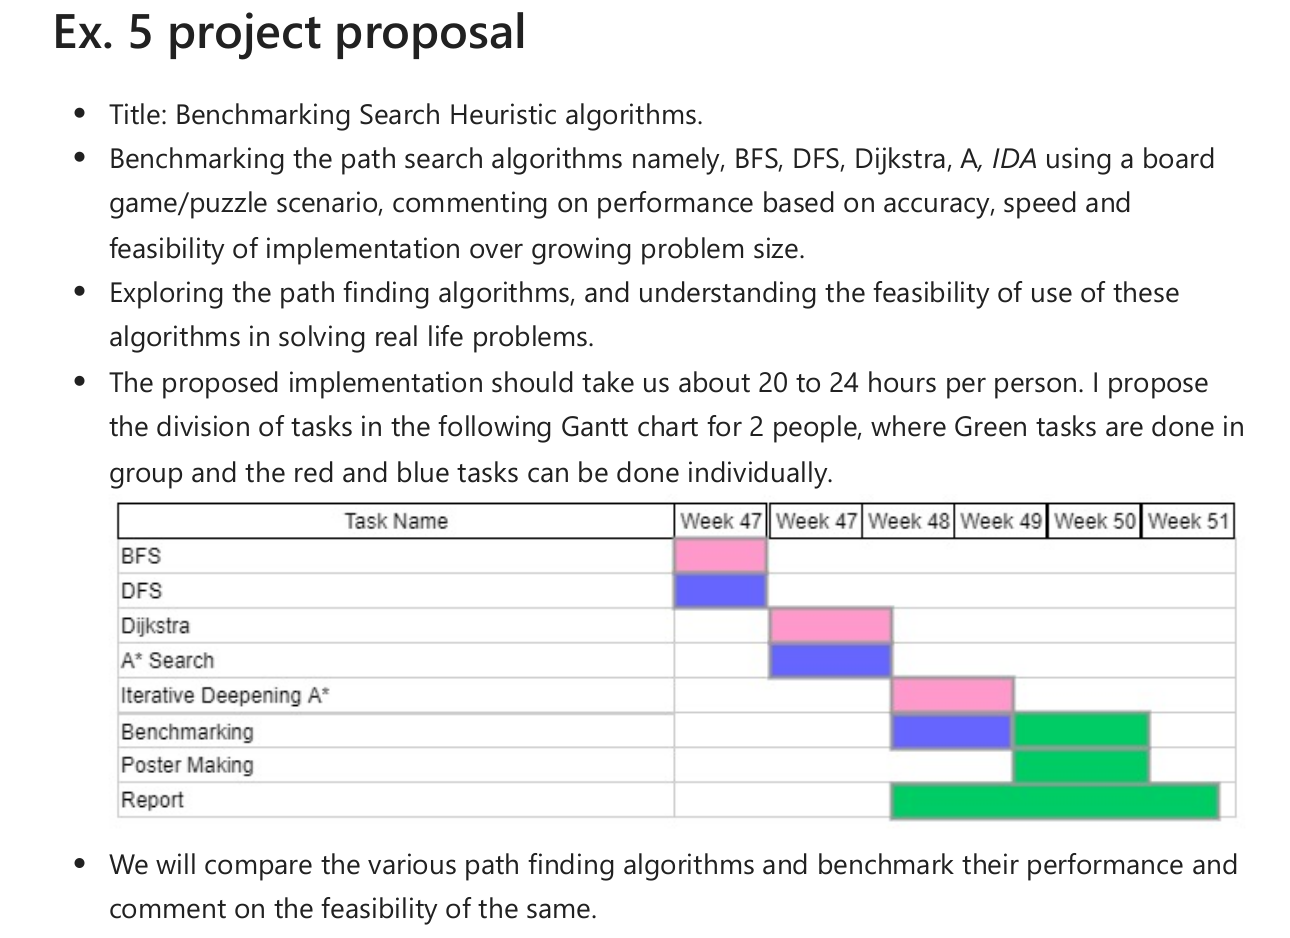

#### Selected Problem for solving: Sliding Puzzle with varying Size

On an 2 x 3 board, there are five tiles labeled from 1 to 5, and an empty square represented by 0. A move consists of choosing 0 and a 4-directionally adjacent number and swapping it.

The state of the board is solved if and only if the board is [[1,2,3],[4,5,0]].

Given the puzzle board board, return the least number of moves required so that the state of the board is solved. If it is impossible for the state of the board to be solved, return -1.

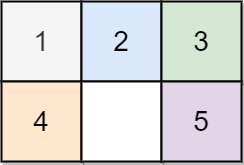

https://leetcode.com/problems/sliding-puzzle/


0. Understand the problem
1. Let's implement 4 different methods: BFS, DFS, Dijkstra, A*
2. Let's generate input data
3. Let's benchmark them
4. Let's plot them, compare, write down the fastest one
5. Let's write down the final report



### BFS

In [8]:
from itertools import permutations
import time, random

In [9]:
import collections
import numpy as np
def slidingPuzzleBFS(board):
    """
    :type board: List[List[int]]
    :rtype: int
    """
    # BFS and each node is the state of the board, convert the board to 1d and use tuple
    # so that it is hashable
    n, m = len(board), len(board[0])
    def get_next_state(state):
        state = list(state)
        index = state.index(0)
        i, j = divmod(index, m)
        next_state = []
        for x, y in [[i+1, j], [i-1, j], [i, j+1], [i, j-1]]:
            if 0 <= x < n and 0 <= y < m:
                new_state = state.copy()
                new_state[index], new_state[x*m+y] = new_state[x*m+y], new_state[index]
                new_state = tuple(new_state)
                if new_state not in visited:
                    visited.add(new_state)
                    next_state.append(new_state)
        return next_state            
                
    initial = []
    final = np.arange(1, (n * m))
    final = tuple(np.append(final, 0))
    for i in range(n):
        for j in range(m):
            initial.append(board[i][j])
    initial = tuple(initial)        
    queue = collections.deque([(initial, 0)])
    visited = set([initial])
    while queue:
        state, dist = queue.pop()
        if state == final: return dist, len(visited)
        for nstate in get_next_state(state):
            queue.appendleft((nstate, dist+1))
    return -1, len(visited)

In [10]:
slidingPuzzleBFS([[1,0,3],[4,2,5],[7,8,6]])

(3, 21)

### DFS

In [11]:
def slidingPuzzleDFS(board):
    """
    :type board: List[List[int]]
    :rtype: int
    """
    # DFS and each node is the state of the board, convert the board to 1d and use tuple
    # so that it is hashable
    n, m = len(board), len(board[0])
    def get_next_state(state):
        state = list(state)
        index = state.index(0)
        i, j = divmod(index, m)
        next_state = []
        for x, y in [[i+1, j], [i-1, j], [i, j+1], [i, j-1]]:
            if 0 <= x < n and 0 <= y < m:
                new_state = state.copy()
                new_state[index], new_state[x*m+y] = new_state[x*m+y], new_state[index]
                new_state = tuple(new_state)
                if new_state not in visited:
                    visited.add(new_state)
                    next_state.append(new_state)
        return next_state            
                
    initial = []
    final = np.arange(1, (n * m))
    final = tuple(np.append(final, 0))
    for i in range(n):
        for j in range(m):
            initial.append(board[i][j])
    initial = tuple(initial)        
    queue = collections.deque([(initial, 0)])
    visited = set([initial])
    while queue:
        state, dist = queue.pop()
        if state == final: return dist, len(visited)
        for nstate in get_next_state(state):
            queue.append((nstate, dist+1))
    return -1, len(visited)

In [12]:
slidingPuzzleDFS([[1,0,3],[4,2,5],[7,8,6]])

(63343, 152115)

### A*

In [13]:
import heapq

def slidingPuzzleAStar(board):
    def heuristic_disance(state, final):
        state, final, count = list(state), list(final), 0
        for index, tile in enumerate(state):
            count += abs(tile - final[index])
        return count

    # BFS and each node is the state of the board, convert the board to 1d and use tuple
    # so that it is hashable
    n, m = len(board), len(board[0])
    def get_next_states(state):
        state = list(state)
        index = state.index(0)
        i, j = divmod(index, m)
        next_states = []
        for x, y in [[i+1, j], [i-1, j], [i, j+1], [i, j-1]]:
            if 0 <= x < n and 0 <= y < m:
                new_state = state.copy()
                new_state[index], new_state[x*m+y] = new_state[x*m+y], new_state[index]
                new_state = tuple(new_state)
                if new_state not in visited:
                    visited.add(new_state)
                    next_states.append(new_state)
        return next_states
                
    initial = []
    final = np.arange(1, (n * m))
    final = tuple(np.append(final, 0))
    for i in range(n):
        for j in range(m):
            initial.append(board[i][j])
    initial = tuple(initial)
    openList = list()
    heapq.heappush(openList, (0, initial, 0))
    visited = set([initial])
    while openList:
        f, state, current_g = heapq.heappop(openList)
        if state == final: 
            return current_g, len(visited)
        for next_state in get_next_states(state):
            g = current_g + 1
            h = heuristic_disance(next_state, final)
            f = g + h
            heapq.heappush(openList, (f, next_state, g))
    return -1, len(visited)

In [14]:
slidingPuzzleAStar([[1,0,3],[4,2,5],[7,8,6]])

(3, 12)

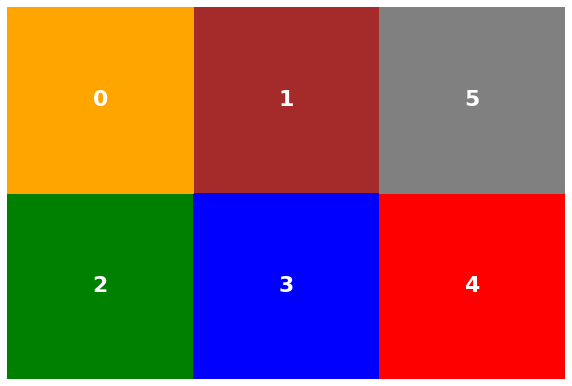

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch

from matplotlib.pyplot import figure

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
rectangles = {1 : mpatch.Rectangle((3,3), 3,3, color='brown'),
              2 : mpatch.Rectangle((0,0), 3,3, color='green'),
              3 : mpatch.Rectangle((3,0), 3,3, color='blue'),
              4 : mpatch.Rectangle((6,0), 3,3, color='red'),
              5 : mpatch.Rectangle((6,3), 3,3, color='grey'),
              0 : mpatch.Rectangle((0,3), 3,3, color='orange')}

for r in rectangles:
    ax.add_artist(rectangles[r])
    rx, ry = rectangles[r].get_xy()
    cx = rx + rectangles[r].get_width()/2.0
    cy = ry + rectangles[r].get_height()/2.0

    ax.annotate(r, (cx, cy), color='w', weight='bold', 
                fontsize=22, ha='center', va='center')

ax.set_xlim((0, 9))
ax.set_ylim((0, 6))
ax.set_aspect('equal')
ax.axis('off')
plt.rcParams.update({'font.size': 20})
plt.show()

https://www.openbookproject.net/py4fun/tiles/tiles.html

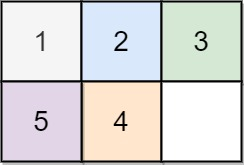

### Benchmarking
- Soft Scaling
- Hard Scaling

In [8]:
# A Python program to print all
# permutations using library function

start = time.time()
 
# Get all permutations of [1, 2, 3]
perms = permutations([x for x in range(6)])
 
# Print the obtained permutations
problems = []
for p in list(perms):
    problems.append(np.reshape(p, (2, 3)).tolist())

random.shuffle(problems)
print("Problems: ", len(problems))

solvable, unsolvable = [], []
start = time.time()
print("Solvable:")
for p in range(999):
    #print(p)
    if slidingPuzzleBFS(problems[p])[0] != -1:
        solvable.append(problems[p])
    else:
        unsolvable.append(problems[p])
    if len(solvable) == 100:
        print("Got 100 solvable solutions")
        break

print(f"Wall time taken: {time.time() - start}s")
np.save("problem_sets_2x3.npy", solvable)
np.save("unsolvable_problem_sets_2x3.npy", unsolvable)

Problems:  720
Solvable:
Got 100 solvable solutions
Wall time taken: 0.13207221031188965s


In [56]:
solvable = np.load("problem_sets_2x3.npy")
print(f"Solving {solvable.shape[0]} problems: of shape {solvable.shape[1:]}")
problems, moves, visits, times = solvable.tolist(), [[], [], []], [[], [], []], [[], [], []]

print("With BFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleBFS(p)
    moves[0].append(total_moves)
    visits[0].append(visited_nodes)
    times[0].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

print("Using DFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleDFS(p)
    moves[1].append(total_moves)
    visits[1].append(visited_nodes)
    times[1].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)
    
print("With A*")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleAStar(p)
    moves[2].append(total_moves)
    visits[2].append(visited_nodes)
    times[2].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

Solving 100 problems: of shape (2, 3)
With BFS:
Total time taken:  0.05720782279968262
Using DFS:
Total time taken:  0.045786380767822266
With A*
Total time taken:  0.048761844635009766


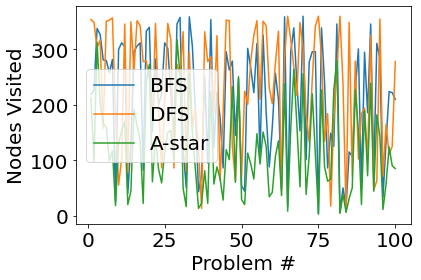

In [57]:
# Nodes Visited
problems = [i+1 for i in range(100)]
plt.plot(problems, visits[0], label="BFS")
plt.plot(problems, visits[1], label="DFS")
plt.plot(problems, visits[2], label="A-star")

plt.xlabel("Problem #")
plt.ylabel("Nodes Visited")
plt.legend()
plt.show()

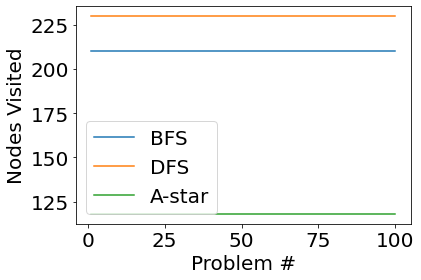

In [58]:
# Avg Nodes Visited
problems = [i+1 for i in range(100)]
plt.plot(problems, [np.mean(visits[0])] * 100, label="BFS")
plt.plot(problems, [np.mean(visits[1])] * 100, label="DFS")
plt.plot(problems, [np.mean(visits[2])] * 100, label="A-star")

plt.xlabel("Problem #")
plt.ylabel("Nodes Visited")
plt.legend()
plt.show()

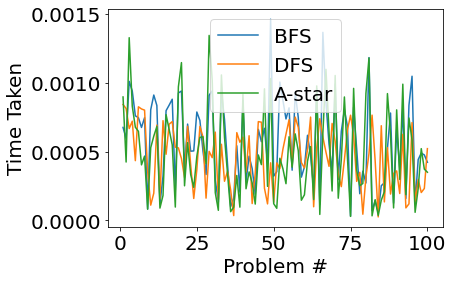

In [59]:
# Time Taken
problems = [i+1 for i in range(100)]
plt.plot(problems, times[0], label="BFS")
plt.plot(problems, times[1], label="DFS")
plt.plot(problems, times[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken")
plt.legend()
plt.show()

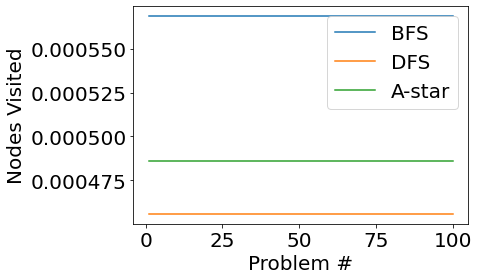

In [60]:
# Avg Time Taken
problems = [i+1 for i in range(100)]
plt.plot(problems, [np.mean(times[0])] * 100, label="BFS")
plt.plot(problems, [np.mean(times[1])] * 100, label="DFS")
plt.plot(problems, [np.mean(times[2])] * 100, label="A-star")

plt.xlabel("Problem #")
plt.ylabel("Nodes Visited")
plt.legend()
plt.show()

In [61]:
avg_visits = [[np.mean(visits[0])], [np.mean(visits[1])], [np.mean(visits[2])]]
avg_visits

[[210.01], [229.69], [118.17]]

In [62]:
avg_times = [[np.mean(times[0])], [np.mean(times[1])], [np.mean(times[2])]]
avg_times

[[0.0005685734748840332], [0.00045578718185424806], [0.00048599481582641604]]

In [63]:
unsolvable = np.load("unsolvable_problem_sets_2x3.npy")
print(f"Solving {unsolvable.shape[0]} problems (Unsolvable): of shape {unsolvable.shape[1:]}")
problems, moves, visits, times = unsolvable.tolist(), [[], [], []], [[], [], []], [[], [], []]

print("With BFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleBFS(p)
    moves[0].append(total_moves)
    visits[0].append(visited_nodes)
    times[0].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

print("Using DFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleDFS(p)
    moves[1].append(total_moves)
    visits[1].append(visited_nodes)
    times[1].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)
    
print("With A*")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleAStar(p)
    moves[2].append(total_moves)
    visits[2].append(visited_nodes)
    times[2].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

Solving 97 problems (Unsolvable): of shape (2, 3)
With BFS:
Total time taken:  0.0928645133972168
Using DFS:
Total time taken:  0.07456851005554199
With A*
Total time taken:  0.15822720527648926


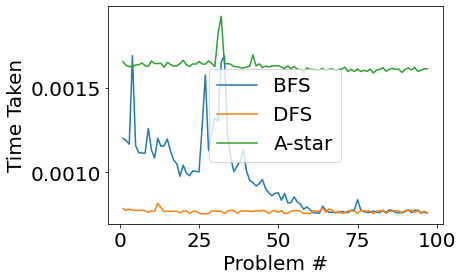

In [64]:
# Time Taken
problems = [i+1 for i in range(unsolvable.shape[0])]
plt.plot(problems, times[0], label="BFS")
plt.plot(problems, times[1], label="DFS")
plt.plot(problems, times[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken")
plt.legend()
plt.show()

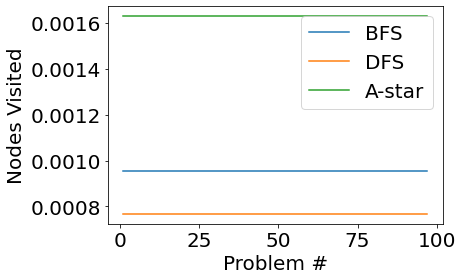

In [66]:
# Avg Time Taken
problem_count = unsolvable.shape[0]
problems = [i+1 for i in range(problem_count)]
plt.plot(problems, [np.mean(times[0])] * problem_count, label="BFS")
plt.plot(problems, [np.mean(times[1])] * problem_count, label="DFS")
plt.plot(problems, [np.mean(times[2])] * problem_count, label="A-star")

plt.xlabel("Problem #")
plt.ylabel("Nodes Visited")
plt.legend()
plt.show()

In [67]:
unsolvable_avg = [[np.mean(times[0])], [np.mean(times[1])], [np.mean(times[2])]]
unsolvable_avg

[[0.0009547582606679385], [0.0007672211558548446], [0.0016297482952629169]]

## 3x3 Sliding Puzzle

In [27]:
# A Python program to print all
# permutations using library function

from itertools import permutations
import time, random

start = time.time()
 
# Get all permutations of [1, 2, 3]
perms = permutations([x for x in range(9)])
 
# Print the obtained permutations
problems = []
for p in list(perms):
    problems.append(np.reshape(p, (3, 3)).tolist())

random.shuffle(problems)
print("Problems: ", len(problems))

solvable, unsolvable = [], []
start = time.time()
print("Solvable:")
for p in range(999):
    #print(p)
    if slidingPuzzleBFS(problems[p])[0] != -1:
        solvable.append(problems[p])
    else:
        unsolvable.append(problems[p])
    if len(solvable) == 100:
        print("Got 100 solvable solutions")
        break

print(f"Wall time taken: {time.time() - start}s")
np.save("problem_sets_3x3.npy", solvable)
np.save("unsolvable_problem_sets_3x3.npy", unsolvable)

Problems:  362880
Solvable:
Got 100 solvable solutions
Wall time taken: 76.0313606262207s


In [68]:
solvable = np.load("problem_sets_3x3.npy")
print(f"Solving {solvable.shape[0]} problems: of shape {solvable.shape[1:]}")
problems, moves, visits, times = solvable.tolist(), [[], [], []], [[], [], []], [[], [], []]

print("With BFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleBFS(p)
    moves[0].append(total_moves)
    visits[0].append(visited_nodes)
    times[0].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

print("Using DFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleDFS(p)
    moves[1].append(total_moves)
    visits[1].append(visited_nodes)
    times[1].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)
    
print("With A*")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleAStar(p)
    moves[2].append(total_moves)
    visits[2].append(visited_nodes)
    times[2].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

Solving 100 problems: of shape (3, 3)
With BFS:
Total time taken:  28.234622716903687
Using DFS:
Total time taken:  31.291712760925293
With A*
Total time taken:  5.672318696975708


In [69]:
avg_visits[0].append(np.mean(visits[0]))
avg_visits[1].append(np.mean(visits[1]))
avg_visits[2].append(np.mean(visits[2]))
avg_visits

[[210.01, 111653.18], [229.69, 140766.12], [118.17, 9084.21]]

In [70]:
avg_times[0].append(np.mean(times[0]))
avg_times[1].append(np.mean(times[1]))
avg_times[2].append(np.mean(times[2]))
avg_times

[[0.0005685734748840332, 0.28234200716018676],
 [0.00045578718185424806, 0.3129127979278564],
 [0.00048599481582641604, 0.05671972274780274]]

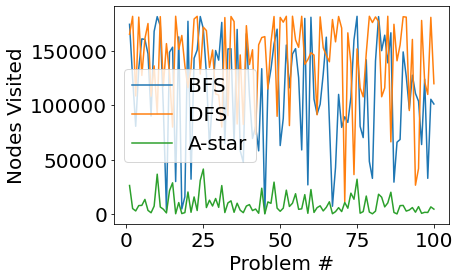

In [71]:
# Nodes Visited
problems = [i+1 for i in range(100)]
plt.plot(problems, visits[0], label="BFS")
plt.plot(problems, visits[1], label="DFS")
plt.plot(problems, visits[2], label="A-star")

plt.xlabel("Problem #")
plt.ylabel("Nodes Visited")
plt.legend()
plt.show()

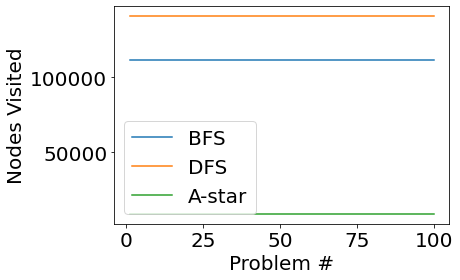

In [72]:
# Avg Nodes Visited
problems = [i+1 for i in range(100)]
plt.plot(problems, [np.mean(visits[0])] * 100, label="BFS")
plt.plot(problems, [np.mean(visits[1])] * 100, label="DFS")
plt.plot(problems, [np.mean(visits[2])] * 100, label="A-star")

plt.xlabel("Problem #")
plt.ylabel("Nodes Visited")
plt.legend()
plt.show()

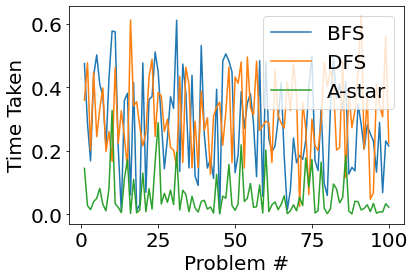

In [73]:
# Time Taken
problems = [i+1 for i in range(100)]
plt.plot(problems, times[0], label="BFS")
plt.plot(problems, times[1], label="DFS")
plt.plot(problems, times[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken")
plt.legend()
plt.show()

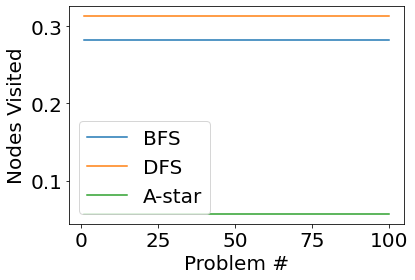

In [74]:
# Avg Time Taken
problems = [i+1 for i in range(100)]
plt.plot(problems, [np.mean(times[0])] * 100, label="BFS")
plt.plot(problems, [np.mean(times[1])] * 100, label="DFS")
plt.plot(problems, [np.mean(times[2])] * 100, label="A-star")

plt.xlabel("Problem #")
plt.ylabel("Nodes Visited")
plt.legend()
plt.show()

### Unsolvable set 3x3

In [75]:
unsolvable = np.load("unsolvable_problem_sets_3x3.npy")
print(f"Solving {unsolvable.shape[0]} problems (Unsolvable): of shape {unsolvable.shape[1:]}")
problems, moves, visits, times = unsolvable.tolist(), [[], [], []], [[], [], []], [[], [], []]

print("With BFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleBFS(p)
    moves[0].append(total_moves)
    visits[0].append(visited_nodes)
    times[0].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

print("Using DFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleDFS(p)
    moves[1].append(total_moves)
    visits[1].append(visited_nodes)
    times[1].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)
    
print("With A*")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleAStar(p)
    moves[2].append(total_moves)
    visits[2].append(visited_nodes)
    times[2].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

Solving 95 problems (Unsolvable): of shape (3, 3)
With BFS:
Total time taken:  54.19035887718201
Using DFS:
Total time taken:  46.57041931152344
With A*
Total time taken:  126.71085405349731


In [76]:
unsolvable_avg[0].append(np.mean(times[0]))
unsolvable_avg[1].append(np.mean(times[1]))
unsolvable_avg[2].append(np.mean(times[2]))
unsolvable_avg

[[0.0009547582606679385, 0.5704199314117432],
 [0.0007672211558548446, 0.49021024202045643],
 [0.0016297482952629169, 1.3337938484392668]]

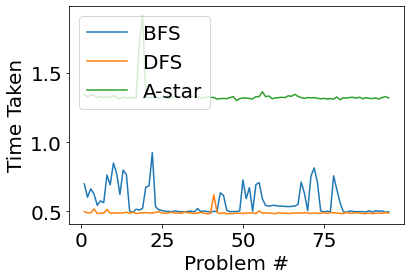

In [77]:
# Time Taken
problems = [i+1 for i in range(unsolvable.shape[0])]
plt.plot(problems, times[0], label="BFS")
plt.plot(problems, times[1], label="DFS")
plt.plot(problems, times[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken")
plt.legend()
plt.show()

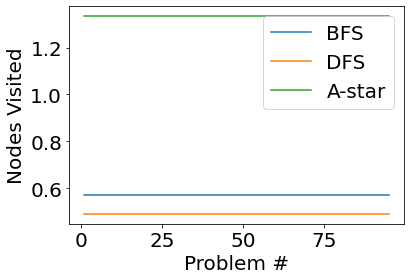

In [78]:
# Avg Time Taken
problem_count = unsolvable.shape[0]
problems = [i+1 for i in range(problem_count)]
plt.plot(problems, [np.mean(times[0])] * problem_count, label="BFS")
plt.plot(problems, [np.mean(times[1])] * problem_count, label="DFS")
plt.plot(problems, [np.mean(times[2])] * problem_count, label="A-star")

plt.xlabel("Problem #")
plt.ylabel("Nodes Visited")
plt.legend()
plt.show()

### Average growths in performance as Size of problem grows..

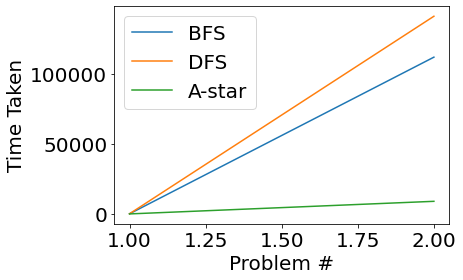

In [79]:
# Avg Nodes Visited
problems = [i+1 for i in range(len(avg_visits[0]))]
plt.plot(problems, avg_visits[0], label="BFS")
plt.plot(problems, avg_visits[1], label="DFS")
plt.plot(problems, avg_visits[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken")
plt.legend()
plt.show()

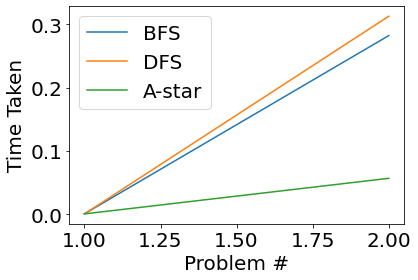

In [80]:
# Avg Time Taken
problems = [i+1 for i in range(len(avg_times[0]))]
plt.plot(problems, avg_times[0], label="BFS")
plt.plot(problems, avg_times[1], label="DFS")
plt.plot(problems, avg_times[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken")
plt.legend()
plt.show()

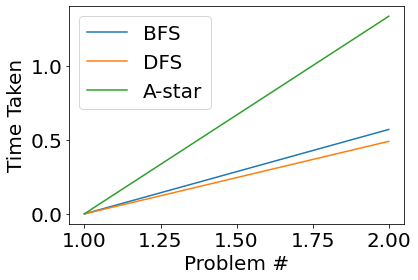

In [81]:
# Avg Time Taken
problems = [i+1 for i in range(len(unsolvable_avg[0]))]
plt.plot(problems, unsolvable_avg[0], label="BFS")
plt.plot(problems, unsolvable_avg[1], label="DFS")
plt.plot(problems, unsolvable_avg[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken")
plt.legend()
plt.show()